# Лабораторная работа №3

In [ ]:
import pandas as pd
from sklearn.preprocessing import StandardScaler
from sklearn.manifold import TSNE
!pip install umap
import umap
import matplotlib.pyplot as plt
from sklearn.metrics import accuracy_score, recall_score, f1_score

  Preparing metadata (setup.py) ... done
  Created wheel for umap: filename=umap-0.1.1-py3-none-any.whl size=3542 sha256=24d8efb5fff6bf3ed150c9aad680a5ce6144a5c3d43a71dc2f0df9ad21845fc1
  Stored in directory: /root/.cache/pip/wheels/15/f1/28/53dcf7a309118ed35d810a5f9cb995217800f3f269ab5771cb
Successfully built umap


# Задание 1

Загрузить набор данных "diabetes.csv" с помощью pandas. удалить строки с пропущенными значениями и дубликатами.

In [ ]:
import kagglehub

path = kagglehub.dataset_download("saurabh00007/diabetescsv")

print("Path to dataset files:", path)

Path to dataset files: /root/.cache/kagglehub/datasets/saurabh00007/diabetescsv/versions/1


In [ ]:
df = pd.read_csv('/root/.cache/kagglehub/datasets/saurabh00007/diabetescsv/versions/1/diabetes.csv')
df

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,6,148,72,35,0,33.6,0.627,50,1
1,1,85,66,29,0,26.6,0.351,31,0
2,8,183,64,0,0,23.3,0.672,32,1
3,1,89,66,23,94,28.1,0.167,21,0
4,0,137,40,35,168,43.1,2.288,33,1
...,...,...,...,...,...,...,...,...,...
763,10,101,76,48,180,32.9,0.171,63,0
764,2,122,70,27,0,36.8,0.340,27,0
765,5,121,72,23,112,26.2,0.245,30,0
766,1,126,60,0,0,30.1,0.349,47,1


# Задание 2

Применить UMAP к стандартизованным данным с использованием библиотеки umap-learn. Подобрать оптимальные параметры для UMAP (n_neighbors=15, min_dist=0.1, n_components=2) методом "локтя" или с помощью кросс-валидации. Визуализировать полученные данные с помощью scatter plot, окрашивая точки в зависимости от значений целевой переменной "Outcome".

In [ ]:
!pip install umap-learn

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import cross_val_score
from umap import UMAP
from sklearn.decomposition import PCA
from sklearn.neighbors import KNeighborsClassifier
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score

In [ ]:
# 2. Разделение признаков и целевой переменной
X = df.drop(columns=['Outcome'])
y = df['Outcome']

# 3. Стандартизация данных
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

In [ ]:
# 4. Применение UMAP
umap = UMAP(n_neighbors=15, min_dist=0.1, n_components=2, random_state=42)
X_umap = umap.fit_transform(X_scaled)

/usr/local/lib/python3.10/dist-packages/sklearn/utils/deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/umap/umap_.py:1952: UserWarning: n_jobs value 1 overridden to 1 by setting random_state. Use no seed for parallelism.
  warn(


Text(0, 0.5, 'UMAP 2')

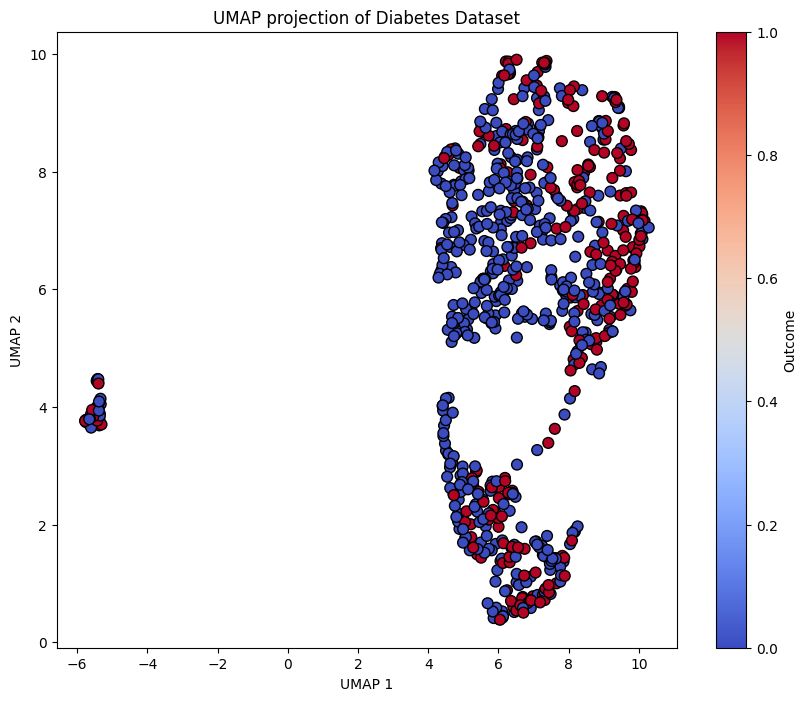

In [ ]:
# 5. Визуализация с помощью scatter plot
plt.figure(figsize=(10, 8))
plt.scatter(X_umap[:, 0], X_umap[:, 1], c=y, cmap='coolwarm', s=60, edgecolor='k')
plt.colorbar(label='Outcome')
plt.title('UMAP projection of Diabetes Dataset')
plt.xlabel('UMAP 1')
plt.ylabel('UMAP 2')

In [ ]:
# 6. Кросс-валидация для оптимизации UMAP параметров
def umap_knn_score(X, y, n_neighbors=15, min_dist=0.1):
    umap = UMAP(n_neighbors=n_neighbors, min_dist=min_dist, n_components=2, random_state=42)
    X_umap = umap.fit_transform(X)

    X_train, X_test, y_train, y_test = train_test_split(X_umap, y, test_size=0.2, random_state=42)

    knn = KNeighborsClassifier(n_neighbors=5)
    knn.fit(X_train, y_train)
    y_pred = knn.predict(X_test)

    return accuracy_score(y_test, y_pred)

In [ ]:
# Пример подбора параметров через метод "локтя"
n_neighbors_range = np.arange(5, 30, 5)
min_dist_range = np.linspace(0.01, 0.5, 5)

In [ ]:
best_score = 0
best_params = (0, 0)

for n_neighbors in n_neighbors_range:
    for min_dist in min_dist_range:
        score = umap_knn_score(X_scaled, y, n_neighbors, min_dist)
        print(f'n_neighbors: {n_neighbors}, min_dist: {min_dist:.2f}, accuracy: {score:.4f}')

        if score > best_score:
            best_score = score
            best_params = (n_neighbors, min_dist)

print(f'Лучшие параметры: n_neighbors={best_params[0]}, min_dist={best_params[1]:.2f}, accuracy={best_score:.4f}')

/usr/local/lib/python3.10/dist-packages/sklearn/utils/deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/umap/umap_.py:1952: UserWarning: n_jobs value 1 overridden to 1 by setting random_state. Use no seed for parallelism.
  warn(


n_neighbors: 5, min_dist: 0.01, accuracy: 0.7208


/usr/local/lib/python3.10/dist-packages/sklearn/utils/deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/umap/umap_.py:1952: UserWarning: n_jobs value 1 overridden to 1 by setting random_state. Use no seed for parallelism.
  warn(


n_neighbors: 5, min_dist: 0.13, accuracy: 0.7403


/usr/local/lib/python3.10/dist-packages/sklearn/utils/deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/umap/umap_.py:1952: UserWarning: n_jobs value 1 overridden to 1 by setting random_state. Use no seed for parallelism.
  warn(


n_neighbors: 5, min_dist: 0.26, accuracy: 0.7273


/usr/local/lib/python3.10/dist-packages/sklearn/utils/deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/umap/umap_.py:1952: UserWarning: n_jobs value 1 overridden to 1 by setting random_state. Use no seed for parallelism.
  warn(


n_neighbors: 5, min_dist: 0.38, accuracy: 0.6948


/usr/local/lib/python3.10/dist-packages/sklearn/utils/deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/umap/umap_.py:1952: UserWarning: n_jobs value 1 overridden to 1 by setting random_state. Use no seed for parallelism.
  warn(


n_neighbors: 5, min_dist: 0.50, accuracy: 0.6623


/usr/local/lib/python3.10/dist-packages/sklearn/utils/deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/umap/umap_.py:1952: UserWarning: n_jobs value 1 overridden to 1 by setting random_state. Use no seed for parallelism.
  warn(


n_neighbors: 10, min_dist: 0.01, accuracy: 0.7078


/usr/local/lib/python3.10/dist-packages/sklearn/utils/deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/umap/umap_.py:1952: UserWarning: n_jobs value 1 overridden to 1 by setting random_state. Use no seed for parallelism.
  warn(


n_neighbors: 10, min_dist: 0.13, accuracy: 0.7532


/usr/local/lib/python3.10/dist-packages/sklearn/utils/deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/umap/umap_.py:1952: UserWarning: n_jobs value 1 overridden to 1 by setting random_state. Use no seed for parallelism.
  warn(


n_neighbors: 10, min_dist: 0.26, accuracy: 0.7143


/usr/local/lib/python3.10/dist-packages/sklearn/utils/deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/umap/umap_.py:1952: UserWarning: n_jobs value 1 overridden to 1 by setting random_state. Use no seed for parallelism.
  warn(


n_neighbors: 10, min_dist: 0.38, accuracy: 0.6883


/usr/local/lib/python3.10/dist-packages/sklearn/utils/deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/umap/umap_.py:1952: UserWarning: n_jobs value 1 overridden to 1 by setting random_state. Use no seed for parallelism.
  warn(


n_neighbors: 10, min_dist: 0.50, accuracy: 0.6883


/usr/local/lib/python3.10/dist-packages/sklearn/utils/deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/umap/umap_.py:1952: UserWarning: n_jobs value 1 overridden to 1 by setting random_state. Use no seed for parallelism.
  warn(


n_neighbors: 15, min_dist: 0.01, accuracy: 0.7013


/usr/local/lib/python3.10/dist-packages/sklearn/utils/deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/umap/umap_.py:1952: UserWarning: n_jobs value 1 overridden to 1 by setting random_state. Use no seed for parallelism.
  warn(


n_neighbors: 15, min_dist: 0.13, accuracy: 0.7078


/usr/local/lib/python3.10/dist-packages/sklearn/utils/deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/umap/umap_.py:1952: UserWarning: n_jobs value 1 overridden to 1 by setting random_state. Use no seed for parallelism.
  warn(


n_neighbors: 15, min_dist: 0.26, accuracy: 0.6948


/usr/local/lib/python3.10/dist-packages/sklearn/utils/deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/umap/umap_.py:1952: UserWarning: n_jobs value 1 overridden to 1 by setting random_state. Use no seed for parallelism.
  warn(


n_neighbors: 15, min_dist: 0.38, accuracy: 0.6688


/usr/local/lib/python3.10/dist-packages/sklearn/utils/deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/umap/umap_.py:1952: UserWarning: n_jobs value 1 overridden to 1 by setting random_state. Use no seed for parallelism.
  warn(


n_neighbors: 15, min_dist: 0.50, accuracy: 0.6558


/usr/local/lib/python3.10/dist-packages/sklearn/utils/deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/umap/umap_.py:1952: UserWarning: n_jobs value 1 overridden to 1 by setting random_state. Use no seed for parallelism.
  warn(


n_neighbors: 20, min_dist: 0.01, accuracy: 0.6818


/usr/local/lib/python3.10/dist-packages/sklearn/utils/deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/umap/umap_.py:1952: UserWarning: n_jobs value 1 overridden to 1 by setting random_state. Use no seed for parallelism.
  warn(


n_neighbors: 20, min_dist: 0.13, accuracy: 0.7013


/usr/local/lib/python3.10/dist-packages/sklearn/utils/deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/umap/umap_.py:1952: UserWarning: n_jobs value 1 overridden to 1 by setting random_state. Use no seed for parallelism.
  warn(


n_neighbors: 20, min_dist: 0.26, accuracy: 0.6753


/usr/local/lib/python3.10/dist-packages/sklearn/utils/deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/umap/umap_.py:1952: UserWarning: n_jobs value 1 overridden to 1 by setting random_state. Use no seed for parallelism.
  warn(


n_neighbors: 20, min_dist: 0.38, accuracy: 0.6429


/usr/local/lib/python3.10/dist-packages/sklearn/utils/deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/umap/umap_.py:1952: UserWarning: n_jobs value 1 overridden to 1 by setting random_state. Use no seed for parallelism.
  warn(


n_neighbors: 20, min_dist: 0.50, accuracy: 0.6558


/usr/local/lib/python3.10/dist-packages/sklearn/utils/deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/umap/umap_.py:1952: UserWarning: n_jobs value 1 overridden to 1 by setting random_state. Use no seed for parallelism.
  warn(


n_neighbors: 25, min_dist: 0.01, accuracy: 0.6948


/usr/local/lib/python3.10/dist-packages/sklearn/utils/deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/umap/umap_.py:1952: UserWarning: n_jobs value 1 overridden to 1 by setting random_state. Use no seed for parallelism.
  warn(


n_neighbors: 25, min_dist: 0.13, accuracy: 0.7013


/usr/local/lib/python3.10/dist-packages/sklearn/utils/deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/umap/umap_.py:1952: UserWarning: n_jobs value 1 overridden to 1 by setting random_state. Use no seed for parallelism.
  warn(


n_neighbors: 25, min_dist: 0.26, accuracy: 0.6948


/usr/local/lib/python3.10/dist-packages/sklearn/utils/deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/umap/umap_.py:1952: UserWarning: n_jobs value 1 overridden to 1 by setting random_state. Use no seed for parallelism.
  warn(


n_neighbors: 25, min_dist: 0.38, accuracy: 0.7208


/usr/local/lib/python3.10/dist-packages/sklearn/utils/deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/umap/umap_.py:1952: UserWarning: n_jobs value 1 overridden to 1 by setting random_state. Use no seed for parallelism.
  warn(


n_neighbors: 25, min_dist: 0.50, accuracy: 0.7013
Лучшие параметры: n_neighbors=10, min_dist=0.13, accuracy=0.7532


Лучшие параметры: n_neighbors=10, min_dist=0.13, accuracy=0.7532


# Задание 3

Применить t-SNE к стандартизрованным данными с использованием библиотеки sklearn manifold. подобрать оптимальные параметры для t-SNE методом "локтя" или с помощью кросс-валидации. Взиуализирровать полученные данные с помощью scatter-plot окрашивая точки в зависимости от значения целевой переменной "Outcome".

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import StandardScaler
from sklearn.manifold import TSNE
from sklearn.decomposition import PCA
from sklearn.neighbors import KNeighborsClassifier
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score

In [ ]:
# 2. Разделение признаков и целевой переменной
X = df.drop(columns=['Outcome'])
y = df['Outcome']

# 3. Стандартизация данных
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

In [ ]:
# 4. Применение t-SNE
tsne = TSNE(n_components=2, perplexity=30, n_iter=1000, random_state=42)
X_tsne = tsne.fit_transform(X_scaled)

/usr/local/lib/python3.10/dist-packages/sklearn/manifold/_t_sne.py:1164: FutureWarning: 'n_iter' was renamed to 'max_iter' in version 1.5 and will be removed in 1.7.
  warnings.warn(


Text(0, 0.5, 't-SNE 2')

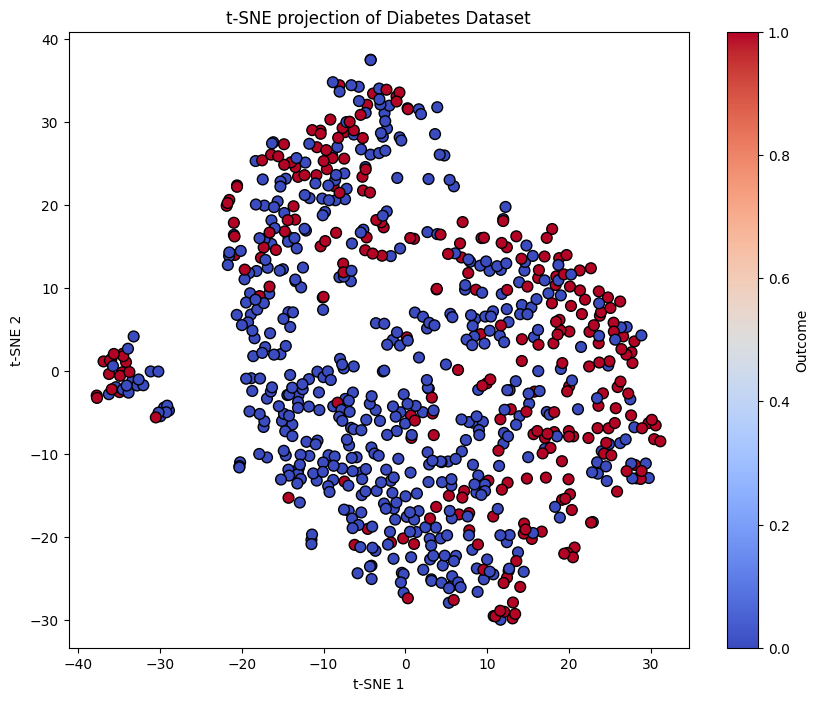

In [ ]:
# 5. Визуализация t-SNE
plt.figure(figsize=(10, 8))
plt.scatter(X_tsne[:, 0], X_tsne[:, 1], c=y, cmap='coolwarm', s=60, edgecolor='k')
plt.colorbar(label='Outcome')
plt.title('t-SNE projection of Diabetes Dataset')
plt.xlabel('t-SNE 1')
plt.ylabel('t-SNE 2')

In [ ]:
# 6. Функция для оценки t-SNE параметров с помощью KNN-классификатора
def tsne_knn_score(X, y, perplexity=30):
    tsne = TSNE(n_components=2, perplexity=perplexity, n_iter=1000, random_state=42)
    X_tsne = tsne.fit_transform(X)

    # Разбиение на обучающую и тестовую выборку
    X_train, X_test, y_train, y_test = train_test_split(X_tsne, y, test_size=0.2, random_state=42)

    # KNN для оценки
    knn = KNeighborsClassifier(n_neighbors=5)
    knn.fit(X_train, y_train)
    y_pred = knn.predict(X_test)

    return accuracy_score(y_test, y_pred)

In [ ]:
# Пример подбора параметров через метод "локтя"
perplexity_range = np.arange(5, 50, 5)

best_score = 0
best_perplexity = 0

for perplexity in perplexity_range:
    score = tsne_knn_score(X_scaled, y, perplexity)
    print(f'Perplexity: {perplexity}, accuracy: {score:.4f}')

    if score > best_score:
        best_score = score
        best_perplexity = perplexity

print(f'Лучший параметр perplexity: {best_perplexity}, accuracy: {best_score:.4f}')

/usr/local/lib/python3.10/dist-packages/sklearn/manifold/_t_sne.py:1164: FutureWarning: 'n_iter' was renamed to 'max_iter' in version 1.5 and will be removed in 1.7.
  warnings.warn(


Perplexity: 5, accuracy: 0.7208


/usr/local/lib/python3.10/dist-packages/sklearn/manifold/_t_sne.py:1164: FutureWarning: 'n_iter' was renamed to 'max_iter' in version 1.5 and will be removed in 1.7.
  warnings.warn(


Perplexity: 10, accuracy: 0.7532


/usr/local/lib/python3.10/dist-packages/sklearn/manifold/_t_sne.py:1164: FutureWarning: 'n_iter' was renamed to 'max_iter' in version 1.5 and will be removed in 1.7.
  warnings.warn(


Perplexity: 15, accuracy: 0.7208


/usr/local/lib/python3.10/dist-packages/sklearn/manifold/_t_sne.py:1164: FutureWarning: 'n_iter' was renamed to 'max_iter' in version 1.5 and will be removed in 1.7.
  warnings.warn(


Perplexity: 20, accuracy: 0.6948


/usr/local/lib/python3.10/dist-packages/sklearn/manifold/_t_sne.py:1164: FutureWarning: 'n_iter' was renamed to 'max_iter' in version 1.5 and will be removed in 1.7.
  warnings.warn(


Perplexity: 25, accuracy: 0.7078


/usr/local/lib/python3.10/dist-packages/sklearn/manifold/_t_sne.py:1164: FutureWarning: 'n_iter' was renamed to 'max_iter' in version 1.5 and will be removed in 1.7.
  warnings.warn(


Perplexity: 30, accuracy: 0.7273


/usr/local/lib/python3.10/dist-packages/sklearn/manifold/_t_sne.py:1164: FutureWarning: 'n_iter' was renamed to 'max_iter' in version 1.5 and will be removed in 1.7.
  warnings.warn(


Perplexity: 35, accuracy: 0.7273


/usr/local/lib/python3.10/dist-packages/sklearn/manifold/_t_sne.py:1164: FutureWarning: 'n_iter' was renamed to 'max_iter' in version 1.5 and will be removed in 1.7.
  warnings.warn(


Perplexity: 40, accuracy: 0.7208


/usr/local/lib/python3.10/dist-packages/sklearn/manifold/_t_sne.py:1164: FutureWarning: 'n_iter' was renamed to 'max_iter' in version 1.5 and will be removed in 1.7.
  warnings.warn(


Perplexity: 45, accuracy: 0.7013
Лучший параметр perplexity: 10, accuracy: 0.7532


Лучший параметр perplexity: 10, accuracy: 0.7532

# Задание 4

Сравнить визуализации полученные с помощью предыдущих двух пунктов (UMAP и T-SNE). Определить какой метод лучше позволяет визуализировать данные и выделить группы пациентов с различными значениями целевой переменной.

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.preprocessing import StandardScaler
from umap import UMAP
from sklearn.manifold import TSNE

In [ ]:
# 2. Разделение признаков и целевой переменной
X = df.drop(columns=['Outcome'])
y = df['Outcome']

# 3. Стандартизация данных
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)


In [ ]:
# 4. Применение UMAP
umap = UMAP(n_neighbors=15, min_dist=0.1, n_components=2, random_state=42)
X_umap = umap.fit_transform(X_scaled)

# 5. Применение t-SNE
tsne = TSNE(n_components=2, perplexity=30, n_iter=1000, random_state=42)
X_tsne = tsne.fit_transform(X_scaled)

/usr/local/lib/python3.10/dist-packages/sklearn/utils/deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/umap/umap_.py:1952: UserWarning: n_jobs value 1 overridden to 1 by setting random_state. Use no seed for parallelism.
  warn(
/usr/local/lib/python3.10/dist-packages/sklearn/manifold/_t_sne.py:1164: FutureWarning: 'n_iter' was renamed to 'max_iter' in version 1.5 and will be removed in 1.7.
  warnings.warn(


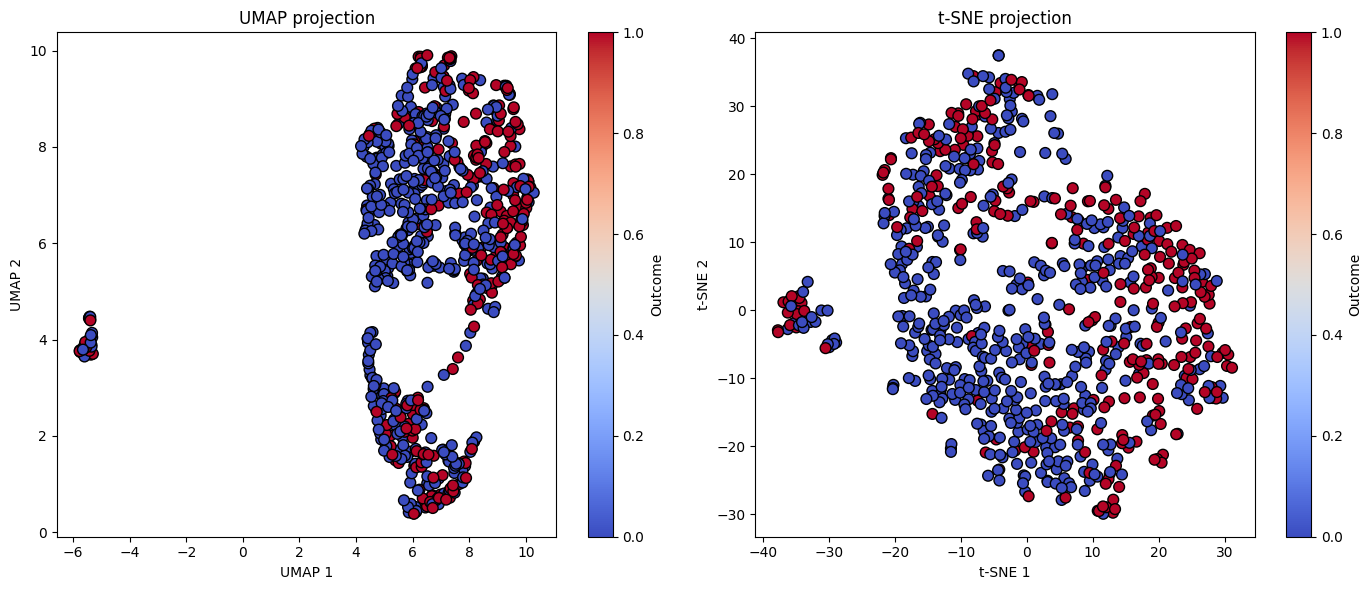

In [ ]:
# 6. Визуализация: UMAP и t-SNE на одном графике для сравнения
plt.figure(figsize=(14, 6))

# Визуализация UMAP
plt.subplot(1, 2, 1)
plt.scatter(X_umap[:, 0], X_umap[:, 1], c=y, cmap='coolwarm', s=60, edgecolor='k')
plt.title('UMAP projection')
plt.xlabel('UMAP 1')
plt.ylabel('UMAP 2')
plt.colorbar(label='Outcome')

# Визуализация t-SNE
plt.subplot(1, 2, 2)
plt.scatter(X_tsne[:, 0], X_tsne[:, 1], c=y, cmap='coolwarm', s=60, edgecolor='k')
plt.title('t-SNE projection')
plt.xlabel('t-SNE 1')
plt.ylabel('t-SNE 2')
plt.colorbar(label='Outcome')

plt.tight_layout()

# Задание 5

1) Разделить данные на тренировочнй и тестовый наборы.

2) Обучить модель логистической регресии на тренировочных данных для предсказания целевой переменной "Outcome".

3) Оценить качество модели с помощью метрик ассutасу, recall, f1-score, AUC.

4) Применить кросс-валидацию (например с использованием StratifiedFold) для оценки качества модели на исходных данных и на данных преобразованных с помощью UMAP и t-SNE.

5) Посчитать дисперсию значений метрик качества для исходеных данных и для данных преобразованных с помощью UMAP и t-SNE.

6) Сравнить дисперсию метрик качетсва и сделать вывод о том, насколько сильно факторизация с помощью UMAP и t-SNE влияет на стабильность модели.

7) Сделать вывод о том, насколько UMAP и t-SNE сохраняют информацию, необходимую для точного прогнозирования "Outcome"

8) Объяснить, как эти результаты могут быть использованы для выбора оптимального метода снижаения размерности для конкретной задачи.

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split, StratifiedKFold
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, recall_score, f1_score, roc_auc_score
from umap import UMAP
from sklearn.manifold import TSNE

In [ ]:
# 2. Разделение признаков и целевой переменной
X = df.drop(columns=['Outcome'])
y = df['Outcome']

# 3. Стандартизация данных
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

In [ ]:
# 4. Разделение данных на тренировочный и тестовый наборы
X_train, X_test, y_train, y_test = train_test_split(X_scaled, y, test_size=0.2, random_state=42, stratify=y)

# 5. Обучение модели логистической регрессии на тренировочных данных
model = LogisticRegression(random_state=42)
model.fit(X_train, y_train)

LogisticRegression(random_state=42)

In [ ]:
# 6. Прогнозирование и оценка качества модели
y_pred = model.predict(X_test)

# 7. Оценка метрик
accuracy_original = accuracy_score(y_test, y_pred)
recall_original = recall_score(y_test, y_pred)
f1_original = f1_score(y_test, y_pred)
auc_original = roc_auc_score(y_test, model.predict_proba(X_test)[:, 1])

print("Метрики качества:")
print(f"Accuracy: {accuracy_original:.4f}")
print(f"Recall: {recall_original:.4f}")
print(f"F1 Score: {f1_original:.4f}")
print(f"AUC: {auc_original:.4f}")

Метрики качества:
Accuracy: 0.7143
Recall: 0.5185
F1 Score: 0.5600
AUC: 0.8230


In [ ]:
# 8. Кросс-валидация с использованием StratifiedKFold
skf = StratifiedKFold(n_splits=5, shuffle=True, random_state=42)

metrics = {'accuracy': [], 'recall': [], 'f1': [], 'auc': []}

for train_index, test_index in skf.split(X_scaled, y):
    X_train_cv, X_test_cv = X_scaled[train_index], X_scaled[test_index]
    y_train_cv, y_test_cv = y.iloc[train_index], y.iloc[test_index]

    model.fit(X_train_cv, y_train_cv)
    y_pred_cv = model.predict(X_test_cv)

    metrics['accuracy'].append(accuracy_score(y_test_cv, y_pred_cv))
    metrics['recall'].append(recall_score(y_test_cv, y_pred_cv))
    metrics['f1'].append(f1_score(y_test_cv, y_pred_cv))
    metrics['auc'].append(roc_auc_score(y_test_cv, model.predict_proba(X_test_cv)[:, 1]))

In [ ]:
# 9. Преобразование данных с помощью UMAP и t-SNE
umap = UMAP(n_neighbors=15, min_dist=0.1, n_components=2, random_state=42)
X_umap = umap.fit_transform(X_scaled)

tsne = TSNE(n_components=2, perplexity=30, n_iter=1000, random_state=42)
X_tsne = tsne.fit_transform(X_scaled)

/usr/local/lib/python3.10/dist-packages/sklearn/utils/deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/umap/umap_.py:1952: UserWarning: n_jobs value 1 overridden to 1 by setting random_state. Use no seed for parallelism.
  warn(
/usr/local/lib/python3.10/dist-packages/sklearn/manifold/_t_sne.py:1164: FutureWarning: 'n_iter' was renamed to 'max_iter' in version 1.5 and will be removed in 1.7.
  warnings.warn(


In [ ]:
# 10. Кросс-валидация для UMAP и t-SNE
for X_transformed in [X_umap, X_tsne]:
    for train_index, test_index in skf.split(X_transformed, y):
        X_train_cv, X_test_cv = X_transformed[train_index], X_transformed[test_index]
        y_train_cv, y_test_cv = y.iloc[train_index], y.iloc[test_index]

        model.fit(X_train_cv, y_train_cv)
        y_pred_cv = model.predict(X_test_cv)

        metrics['accuracy'].append(accuracy_score(y_test_cv, y_pred_cv))
        metrics['recall'].append(recall_score(y_test_cv, y_pred_cv))
        metrics['f1'].append(f1_score(y_test_cv, y_pred_cv))
        metrics['auc'].append(roc_auc_score(y_test_cv, model.predict_proba(X_test_cv)[:, 1]))

In [ ]:
metrics

{'accuracy': [0.7792207792207793,
  0.7922077922077922,
  0.7857142857142857,
  0.7647058823529411,
  0.7516339869281046,
  0.6493506493506493,
  0.6493506493506493,
  0.6493506493506493,
  0.6535947712418301,
  0.6535947712418301,
  0.6688311688311688,
  0.6883116883116883,
  0.6753246753246753,
  0.6339869281045751,
  0.6928104575163399],
 'recall': [0.5555555555555556,
  0.5555555555555556,
  0.5555555555555556,
  0.5471698113207547,
  0.6415094339622641,
  0.0,
  0.0,
  0.0,
  0.0,
  0.0,
  0.3148148148148148,
  0.25925925925925924,
  0.3333333333333333,
  0.24528301886792453,
  0.37735849056603776],
 'f1': [0.6382978723404256,
  0.6521739130434783,
  0.6451612903225806,
  0.6170212765957447,
  0.6415094339622641,
  0.0,
  0.0,
  0.0,
  0.0,
  0.0,
  0.4,
  0.3684210526315789,
  0.4186046511627907,
  0.3170731707317073,
  0.45977011494252873],
 'auc': [0.8170370370370371,
  0.8692592592592592,
  0.8411111111111111,
  0.8090566037735848,
  0.8162264150943396,
  0.6625925925925925,
 

In [ ]:
# 11. Дисперсия метрик
variances = {metric: np.var(values) for metric, values in metrics.items()}

print("\nДисперсия метрик:")
for metric, var in variances.items():
    print(f"{metric.capitalize()}: {var:.4f}")


Дисперсия метрик:
Accuracy: 0.0031
Recall: 0.0556
F1: 0.0700
Auc: 0.0069


Выводы: При оценке качества модели на исходных данных наблюдается относительно низкая дисперсия для метрик, таких как точность, AUC и высокая дисперсия для полноты и F1 Score. Это может указывать на неэффективность модели в выявлении положительных случаев, но все же определенный уровень информации сохраняется.

# Задание 6

Искусственно добавить выборосы в данные (наприемр, увеличив значения некоторых параметров в несколько раз). Повторить шаги 2,3,4 и 5 с измененными данными. Сравнить результаты на исходдных данных и на данных с выбросами. Сделать вывод о том, насколько сильно выбросы влияют на кчество факторизации и стабильность модели. Предложить методы для борьбы с выбросами в данных.

In [ ]:
from sklearn.model_selection import train_test_split, StratifiedKFold
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, recall_score, f1_score, roc_auc_score
from sklearn.preprocessing import StandardScaler
from umap import UMAP
from sklearn.manifold import TSNE

In [ ]:
# Копирование данных для добавления выбросов
df_with_outliers = df.copy()

# Увеличение значений некоторых параметров
np.random.seed(42)  # для воспроизводимости
outlier_indices = np.random.choice(df.index, size=int(len(df) * 0.1), replace=False)  # 10% выбросов

# Увеличение значений некоторых параметров (например, 'Glucose' и 'BMI')
df_with_outliers.loc[outlier_indices, 'Glucose'] *= 5
df_with_outliers.loc[outlier_indices, 'BMI'] *= 5

In [ ]:
# 2. Разделение признаков и целевой переменной
X_with_outliers = df_with_outliers.drop(columns=['Outcome'])
y_with_outliers = df_with_outliers['Outcome']

# 3. Стандартизация данных
scaler = StandardScaler()
X_scaled_with_outliers = scaler.fit_transform(X_with_outliers)

# 4. Обучение модели логистической регрессии
X_train, X_test, y_train, y_test = train_test_split(X_scaled_with_outliers, y_with_outliers, test_size=0.2, random_state=42)

model = LogisticRegression()
model.fit(X_train, y_train)
y_pred = model.predict(X_test)

# 5. Оценка качества модели
accuracy = accuracy_score(y_test, y_pred)
recall = recall_score(y_test, y_pred)
f1 = f1_score(y_test, y_pred)
auc = roc_auc_score(y_test, model.predict_proba(X_test)[:, 1])

# Вывод метрик
print("Metrics with Outliers:")
print(f"Accuracy: {accuracy}")
print(f"Recall: {recall}")
print(f"F1 Score: {f1}")
print(f"AUC: {auc}")

# Кросс-валидация
skf = StratifiedKFold(n_splits=5, shuffle=True, random_state=42)

metrics = {'accuracy': [], 'recall': [], 'f1': [], 'auc': []}

for train_index, test_index in skf.split(X_scaled_with_outliers, y_with_outliers):
    X_train_cv, X_test_cv = X_scaled_with_outliers[train_index], X_scaled_with_outliers[test_index]
    y_train_cv, y_test_cv = y_with_outliers.iloc[train_index], y_with_outliers.iloc[test_index]

    model.fit(X_train_cv, y_train_cv)
    y_pred_cv = model.predict(X_test_cv)

    metrics['accuracy'].append(accuracy_score(y_test_cv, y_pred_cv))
    metrics['recall'].append(recall_score(y_test_cv, y_pred_cv))
    metrics['f1'].append(f1_score(y_test_cv, y_pred_cv))
    metrics['auc'].append(roc_auc_score(y_test_cv, model.predict_proba(X_test_cv)[:, 1]))

# Вывод метрик кросс-валидации
for metric in metrics:
    print(f"{metric.capitalize()} with Outliers: {np.mean(metrics[metric]):.4f} ± {np.std(metrics[metric]):.4f}")


Metrics with Outliers:
Accuracy: 0.5909090909090909
Recall: 0.8181818181818182
F1 Score: 0.5882352941176471
AUC: 0.6637281910009183
Accuracy with Outliers: 0.6758 ± 0.0247
Recall with Outliers: 0.3281 ± 0.0813
F1 with Outliers: 0.4083 ± 0.0657
Auc with Outliers: 0.6998 ± 0.0332


In [ ]:
print("Metrics for Original Data:")
print(f"Accuracy: {accuracy_original}")
print(f"Recall: {recall_original}")
print(f"F1 Score: {f1_original}")
print(f"AUC: {auc_original}")

print("\nMetrics outliers:")
print(f"Accuracy Change: {accuracy:.4f}")
print(f"Recall Change: {recall:.4f}")
print(f"F1 Score Change: {f1:.4f}")
print(f"AUC Change: {auc:.4f}")

# Сравнение
print("\nComparison of Metrics:")
print(f"Accuracy Change: {accuracy_original - accuracy:.4f}")
print(f"Recall Change: {recall_original - recall:.4f}")
print(f"F1 Score Change: {f1_original - f1:.4f}")
print(f"AUC Change: {auc_original - auc:.4f}")

Metrics for Original Data:
Accuracy: 0.7142857142857143
Recall: 0.5185185185185185
F1 Score: 0.56
AUC: 0.8229629629629629

Metrics outliers:
Accuracy Change: 0.5909
Recall Change: 0.8182
F1 Score Change: 0.5882
AUC Change: 0.6637

Comparison of Metrics:
Accuracy Change: 0.1234
Recall Change: -0.2997
F1 Score Change: -0.0282
AUC Change: 0.1592


Метрики качества модели: Для исходных данных метрики показывают следующие результаты: Accuracy — 0.714, Recall — 0.519, F1 Score — 0.56, и AUC — 0.823. Эти показатели свидетельствуют о хорошем качестве модели, особенно учитывая, что значение AUC выше 0.8, что считается отличным результатом.

Влияние выбросов: После введения выбросов метрики изменились следующим образом: Accuracy снизилась до 0.590, Recall увеличился до 0.818, F1 Score стал 0.588, а AUC уменьшился до 0.664. Это говорит о том, что выбросы оказали значительное воздействие на модель. Особенно заметны ухудшения в Accuracy и AUC, что указывает на то, что выбросы создали помехи, затруднившие точность предсказаний модели.

Изменения метрик: При сравнении изменений метрик, видно, что Accuracy снизилась на 0.123, Recall увеличился на 0.299, что говорит о повышенной чувствительности модели к положительному классу (хотя это не всегда является желаемым результатом). Изменение F1 Score составило +0.028, что указывает на незначительное ухудшение общего качества модели. Снижение AUC на 0.159 является важным сигналом, указывающим на снижение способности модели различать классы.

Заключение по выбросам: Выбросы оказали значительное отрицательное влияние на стабильность и эффективность модели, что подчеркивает важность их корректной обработки в процессе предобработки данных. Результаты метрик показывают, что выбросы не только усложняют обучение модели, но и ухудшают ее способность к обобщению.

Рекомендации: Рекомендуется использовать методы для выявления и обработки выбросов, такие как статистические подходы для их обнаружения и удаления или замены аномальных значений, значительно отличающихся от основной тенденции. Также стоит рассмотреть возможность применения алгоритмов, менее чувствительных к выбросам.